In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [15]:
class KMeans(object): # Unsupervised(clustering) ML algorithm that segments images into parts of number K
    def __init__(self, k_):
        self.image = cv2.imread('original.jpg')
        self.image_copy = np.copy(self.image)
        self.image_copy = cv2.cvtColor(self.image_copy, cv2.COLOR_BGR2RGB)
        self.pix = self.image_copy.reshape((-1, 3))  # Turning image into 2D array image with 3 channels
        self.pix = np.float32(self.pix)
        # Define criteria to stop the algorithm from finding means
        self.criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        # Performing k-means clustering
        self.k = k_
        self.ret, self.lab, self.ctrs = cv2.kmeans(self.pix, self.k, None, self.criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        # Convert data into 8-bit value
        self.ctrs = np.uint8(self.ctrs)
        self.segmented = self.ctrs[self.lab.flatten()]
        # Reshape segmented data into original image size again
        self.segmented = self.segmented.reshape(self.image_copy.shape)
        self.lab = self.lab.reshape(self.image_copy.shape[0], self.image_copy.shape[1])
        # Display
        f, (ax1, ax2) = plt.subplots(1, 2)
        ax1.set_title("Normal")
        ax1.imshow(self.image_copy, cmap="gray")
        ax2.set_title("Filtered")
        ax2.imshow(self.segmented)
        plt.show()
        print(self.image.shape)


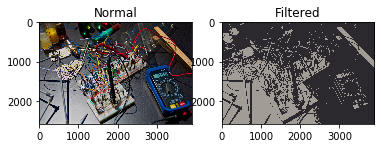

(2592, 3888, 3)


In [16]:
KMeans(2)

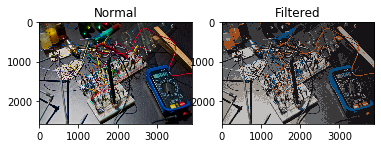

(2592, 3888, 3)


In [17]:
KMeans(7)

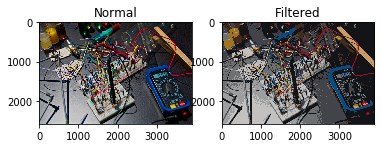

(2592, 3888, 3)


In [18]:
KMeans(10)